*Name*: Kevin Shurtz  
*Class*: Pattern Recognition Spring 2018

# PATTERN RECOGNITION HOMEWORK 1
Given a dataset and three classifiers, I will determine the most appropriate classifier for the data, detail which classifiers maximize precision, and find the optimal probability threshold of the best classifier.

## Problem Description
The dataset will consist of 100 samples, each with 8 features.  Three of those features will be made informative for the test.  In other words, five of the features will essentially be noise that should prove unhelpful when classifying the data.  

The three classifiers will consist of the following:
* A C-Support Vector Classifier with polynomial combinations of features (`svc`) 
* A decision tree classifier with a maximum depth of 4 (`dtr`)
* A neural network machine learning classifier (`ann`)  

I will determine the classifier that maximizes accuracy, determine the classifier that maximizes precision, and I will determine the classifier that minimizes false positives.  

Additionally, I will determine optimal probablity threshhold for the most accurate classfier, and I will use it to examine a second dataset captured in variable `X_new`.

## Solution Method
To compare the classifiers, first, I will train them given a sample of training data.  I will then evaluate their accuracies when run against separate test data. The classifier that produces the highest accuracy score when run against the test data will be deemed the best classifier.  

In the event that two classifiers produce the same accuracy rating, I will then evaluate the precision of each classifier. Should one of the tying classifiers possess a superior precision, it shall be deemed the best classifier.

## Input

In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Create an arbitrary dataset with the aforementioned attributes
X, y = datasets.make_classification(
    n_samples=100,
    n_features=8,
    n_informative=3,
    n_classes=2,
    class_sep=0.7,
    random_state=1)

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a similar but smaller dataset
X_new, _ = datasets.make_classification(
    n_samples=5,
    n_features=8,
    n_informative=3,
    n_classes=2,
    class_sep=0.7,
    random_state=1)

## Analysis

In [108]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn import neural_network

# C-support vector classifier with polynomial combinations
svc = SVC(kernel='poly', C=1, probability=True)

# Decision tree classifier
dtr = tree.DecisionTreeClassifier(max_depth=4)

# Neural network machine learning classifier
ann = neural_network.MLPClassifier(random_state=1)

# Train all classifiers
classifiers = (svc, dtr, ann)

for clf in classifiers:
    clf.fit(X_train, y_train)

# Error for neural network expected, since the neural network is configured badly

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Results

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pred_prob_list = list()

# Evaluate data points
for clf in classifiers:
    # Determine the classifications and associated probabilities
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]
    
    # View the classifications in relation to the correct classifications
    pred_prob_list.append((y_pred, y_prob))

In [110]:
df = pd.DataFrame(data={
    'SVC Score':         pred_prob_list[0][0],
    'SVC Probability':   pred_prob_list[0][1],
    'DTree Score':       pred_prob_list[1][0],
    'DTree Probability': pred_prob_list[1][1],
    'NN Score':          pred_prob_list[2][0],
    'NN Probability':    pred_prob_list[2][1],
    'Actual':            y_test
})
df

,Actual,DTree Probability,DTree Score,NN Probability,NN Score,SVC Probability,SVC Score
0,1,0.964286,1,0.928623,1,0.709658,1
1,0,0.000000,0,0.000848,0,0.269407,0
2,1,0.964286,1,0.969652,1,0.492939,1
3,1,0.222222,0,0.261078,0,0.409101,0
4,0,0.000000,0,0.170395,0,0.415633,0
5,1,0.964286,1,0.985224,1,0.983518,1
6,0,0.222222,0,0.300488,0,0.425599,0
7,1,0.964286,1,0.805797,1,0.478092,1
8,0,0.000000,0,0.661828,1,0.433669,1
9,1,0.964286,1,0.828051,1,0.472425,1


In [112]:
from sklearn.metrics import classification_report, accuracy_score

# Create confusion matrices for each of classifier results
print("SVC Report")
print("Accuracy: ", accuracy_score(y_test, pred_prob_list[0][0]))
print(classification_report(y_test, pred_prob_list[0][0]))

print("Decision Tree Report")
print("Accuracy: ", accuracy_score(y_test, pred_prob_list[1][0]))
print(classification_report(y_test, pred_prob_list[1][0]))

print("Neural Network Report")
print("Accuracy: ", accuracy_score(y_test, pred_prob_list[2][0]))
print(classification_report(y_test, pred_prob_list[2][0]))

SVC Report
Accuracy:  0.8
             precision    recall  f1-score   support

          0       0.80      0.73      0.76        11
          1       0.80      0.86      0.83        14

avg / total       0.80      0.80      0.80        25

Decision Tree Report
Accuracy:  0.8
             precision    recall  f1-score   support

          0       0.75      0.82      0.78        11
          1       0.85      0.79      0.81        14

avg / total       0.80      0.80      0.80        25

Neural Network Report
Accuracy:  0.72
             precision    recall  f1-score   support

          0       0.67      0.73      0.70        11
          1       0.77      0.71      0.74        14

avg / total       0.72      0.72      0.72        25



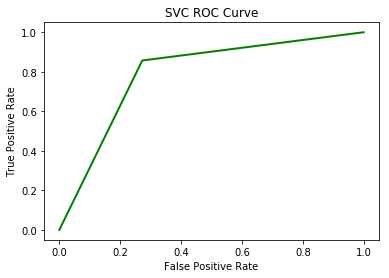

ROC curve area:      0.792
False positive rate: 0.272727272727
True positive rate:  0.857142857143


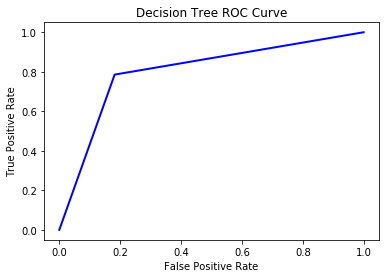

ROC curve area:      0.802
False positive rate: 0.181818181818
True positive rate:  0.785714285714


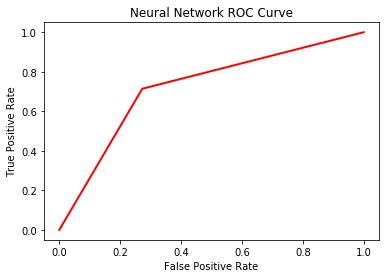

ROC curve area:      0.721
False positive rate: 0.272727272727
True positive rate:  0.714285714286


In [138]:
from sklearn.metrics import roc_curve, auc

# Create ROC Curve for visualization
lw = 2
clf_data = [('green', 'SVC'), ('blue', 'Decision Tree'), ('red', 'Neural Network')]
clf_selection = 0

for clf_pair in pred_prob_list:
    fpr, tpr, threshold = roc_curve(y_test, clf_pair[0])
    
    # Area under curve
    roc_auc = auc(fpr, tpr)
    
    # Add ROC curve to graph
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title(clf_data[clf_selection][1] + ' ROC Curve')
    
    plt.plot(fpr, tpr, color=clf_data[clf_selection][0], lw=lw)
    plt.show()
    
    print('ROC curve area:      %0.3f' % roc_auc)
    print('False positive rate:', fpr[1])
    print('True positive rate: ', tpr[1])
    
    clf_selection += 1


In [155]:
# The decision tree classifier seems to produce the best results
print('Scores:\n', dtr.predict(X_new), '\n')
print('Probabilities:\n', dtr.predict_proba(X_new))

Scores:
 [0 0 1 0 1] 

Probabilities:
 [[ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.03571429  0.96428571]
 [ 1.          0.        ]
 [ 0.03571429  0.96428571]]


## Discussion
### Overview
It is generally clear from the data above that the decision tree classifier is superior to the SVC and neural network classifier, though the SVC classifier is very close to the decision tree classifier in performance.

### Reasoning
Classifiers `svc`, `dtr`, and `ann` attained accuracy rates of 0.8, 0.8, and 0.72, respectively.  This implies that while the SVC and decision tree classifers possessed similar accuracy, the neural network performed particularly badly.  This is not surprising, given the small sample data set and the warning that the neural network had not converged.

While the SVC and decision tree classifiers tied in accuracy, the decision tree classifier attained a higher (positive) precision rating (0.85), though this came at the expense of its "negative precision" (0.75).  By contrast, the SVC classifier scored an even 0.80 in both variants of precision.

The decision tree classifier also has the largest area under its ROC curve (0.802), suggesting the curve is closer to "ROC heaven" than either of its competitors (0.792 and 0.721 for the SVC and neural network classifiers, respectively).

Lastly, the decision tree classifier had the lowest false positive rate of any classifier (about 0.182).  The SVC and neural network classifiers both had false positive rates of about 0.273.  The SVC classifier did have a slightly higher true positive rate, but assuming that the classifier is used in an environment in which false negatives and false positives are equally damaging, the "area under the curve" test still demonstrates that the decision tree is superior.